In [31]:
#General purpose packages for data processing
import pandas as pd
import pickle
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [32]:
#Collecting data
columns_to_extract = ['CPU Usage', 'Memory Usage', 'IO Usage', 'Process Num', 'Network Bytes Rate', 'Packet Count', 'GPS X Offset', 'GPS Y Offset']
combined_data = pd.read_csv('Combined_Training_Dataset_for_AI_Monitor.csv')

In [33]:
#---------EVALUATING MULTIPLE MODELS, TESTING WITH WEAPONS ICS-------------------#

# Features and labels
X = combined_data[columns_to_extract]  # Features
y = combined_data['Attack_Type']       # Labels
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [37]:
# Define models
models = {
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Support Vector Classifier': SVC(kernel='linear', random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
}

In [38]:
# Results container
results = {}


--- Evaluating Random Forest ---
Accuracy: 0.9995
F1-Score: 0.9995


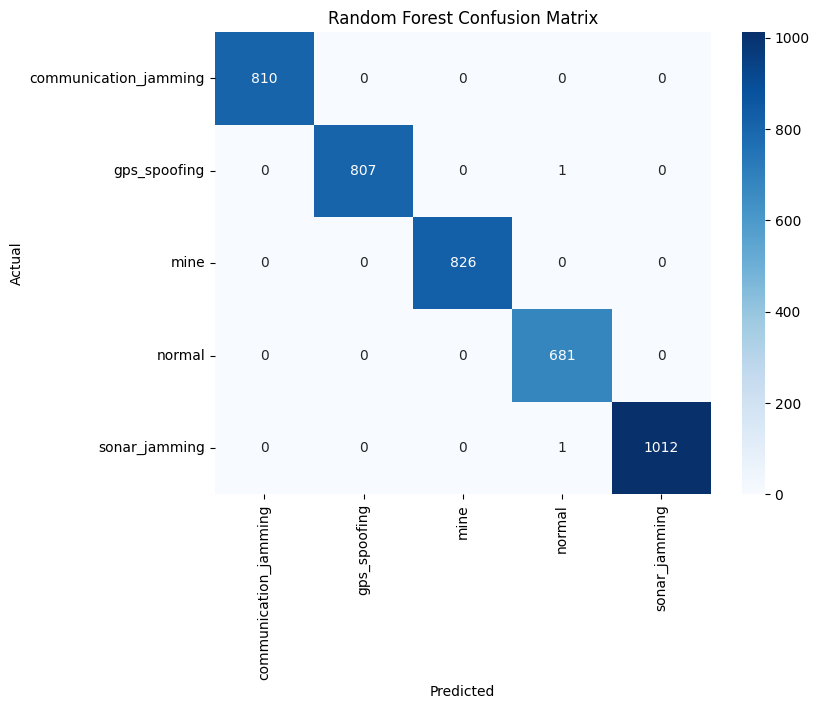


--- Evaluating Support Vector Classifier ---
Accuracy: 0.9993
F1-Score: 0.9993


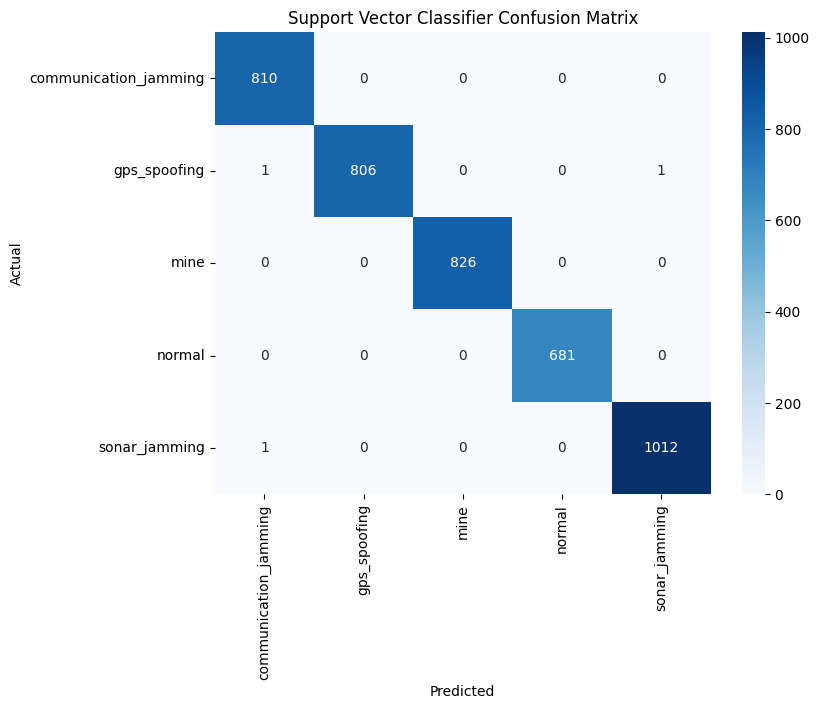


--- Evaluating K-Nearest Neighbors ---
Accuracy: 0.9993
F1-Score: 0.9993


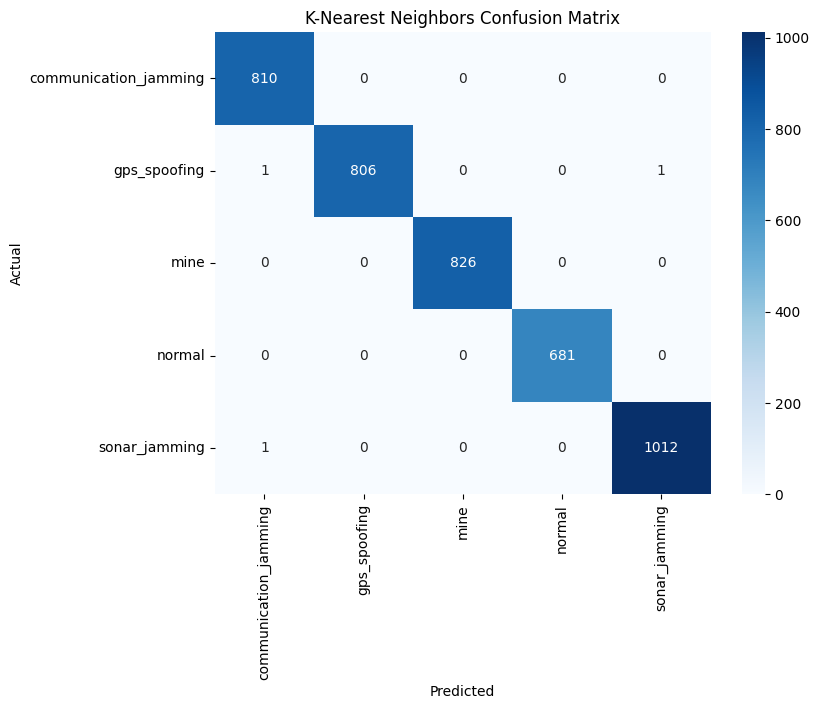

In [39]:
# Train and evaluate each model
for name, model in models.items():
    print(f"\n--- Evaluating {name} ---")
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Evaluate performance
    conf_matrix = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Weighted average for multi-class
    
    
    # Save results
    results[name] = {
        'Confusion Matrix': conf_matrix,
        'Accuracy': acc,
    }
    
    # Display metrics
    print(f"Accuracy: {acc:.4f}")
    print(f"F1-Score: {f1:.4f}")
    
    # Visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [40]:
#Random forest performed the best, training security monitor on that:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [41]:
# Save the model to a .pkl file
with open('ICS_Monitor.pkl', 'wb') as file:
    pickle.dump(rf_model, file)